In [2]:
from sympy import *
init_printing(use_unicode=True)

In [30]:
def seq(t1=Symbol('t_1'),
           t2=Symbol('t_2'),
           l=Symbol('l'),
           q=Symbol('q'),
           m1=Symbol('m_1'),
           m2=Symbol('m_2'),
           b1=Symbol('b_1'),
           b2=Symbol('b_2')):
    #profits
    pi1 = .5*( (t2-t1)/3.0 +q)*(1+ (1/(3*q))*(t2-t1) )
    pi2 = .5*( (t1-t2)/3.0 +q)*(1+ (1/(3*q))*(t1-t2) )
    #use SPE/backward induction to solve game

    #nash bargaining objectives
    v2 = (pi2 - pi2.subs(t2,l) )**b2 * (m1*t1 +m2*t2)**(1-b2)

    #second mover
    v2_foc = diff(v2,t2)
    #solve for t1 as a function of t2
    h1 = solve(v2_foc,t2)
    h1 = h1[-1]
    #susbitute h1 for t2, then substitute l into the second term for t1
    v1 = (pi1.subs(t2,h1) - pi2.subs({t1:l, t2:(h1.subs(t1,l))}) )**b1 * (m1*t1 + m2*h1)**(1-b1)
    v1_foc = diff(v1,t1)
    
    t1_param = solve(v1_foc,t1)[-1]
    t2_param = h1.subs(t1,t1_param) 

    pi1_param = pi1.subs({t1:t1_param, t2:t2_param})
    pi2_param = pi2.subs({t1:t1_param, t2:t2_param})
    
    return (l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param)
    
seq(l = 1,q = 1, m1 = .5, m2 = .5, b1 = .5,b2 = .5)

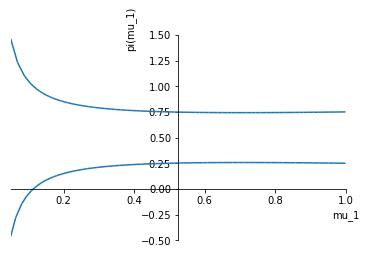

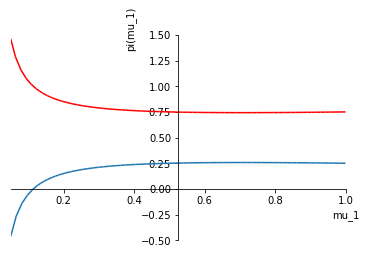

In [8]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1,q = 1, m2 = .5, b1 = .5,b2 = .5)
graph1 = plot(pi1_param,pi2_param,(m1,.05,1.0),ylabel='pi(mu_1)',xlabel='mu_1')
graph1[0].line_color = 'r'
graph1.save('plots/m1_5_seq.png')

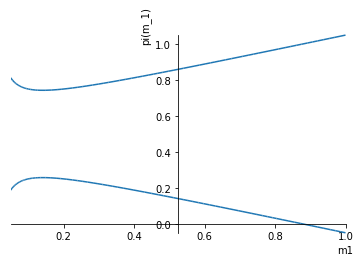

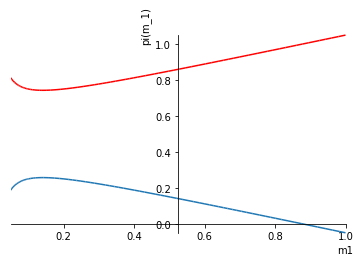

In [50]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1, q = 1, m2 = .1, b1 = .5,b2 = .5)
graph2= plot(pi1_param,pi2_param,(m1,.05,1.0),ylabel='pi(m_1)',xlabel='m1')
graph2[0].line_color = 'r'
graph2.save('plots/m1_1_seq.png')

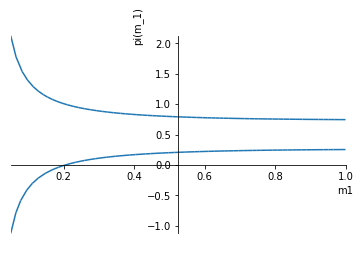

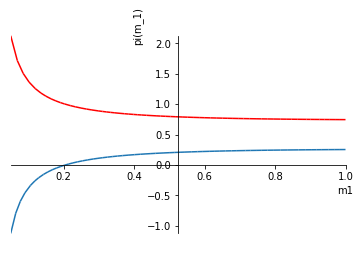

In [51]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1, q = 1, m2 = .9, b1 = .5,b2 = .5)
graph2= plot(pi1_param,pi2_param,(m1,.05,1.0),ylabel='pi(m_1)',xlabel='m1')
graph2[0].line_color = 'r'
graph2.save('plots/m1_9_seq.png')

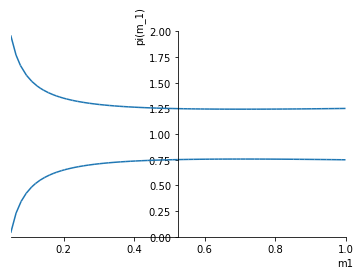

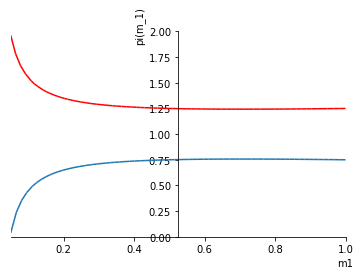

In [52]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1, q = 2, m2 = .5, b1 = .5,b2 = .5)
graph2= plot(pi1_param,pi2_param,(m1,.05,1.0),ylabel='pi(m_1)',xlabel='m1')
graph2[0].line_color = 'r'
graph2.save('plots/change_q.png')

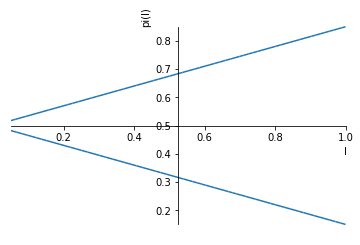

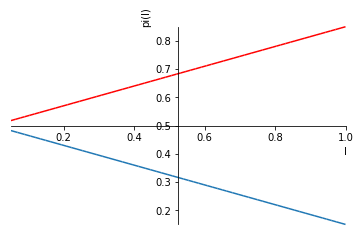

In [35]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(q = 1, m1 = .2, m2=.5, b1 = .5,b2 = .5)
graph4= plot(pi1_param,pi2_param,(l,.05,1),ylabel='pi(l)',xlabel='l')
graph4[0].line_color = 'r'
graph4.save('plots/l_seq.png')

In [48]:
#graph for q is broken...

(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1, m1 = .5, m2=.5, b1 = .5,b2 = .5)
graph3= plot(pi1_param,pi2_param,(q,1,1.5),ylabel='pi(q)',xlabel='q')
graph3.save('plots/q_seq.png')

IndexError: list index out of range

In [47]:
#vary m1, write results to file
out = open("seq.csv","w+")
out.write('l,lambda,mu_1,mu_2,beta_1,beta_2,theta_1,theta_2,pi_1,pi_2\n')
for m in range(5,100,5):
    m = m/100.0
    out.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%seq(l = 1,q = 1, m1 = m, m2 = .5, b1 = .5,b2 = .5))
out.close()

In [25]:
#make graphs for theta

(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1,q = .5, m2 = .5, b1 = .5,b2 = .5)
graph1 = plot(t1_param,t2_param,(m1,.05,1.0),ylabel='theta(mu_1)',xlabel='mu_1')
graph1[0].line_color = 'r'
graph1.save('theta_plots/mu1_seq.png')

IndexError: list index out of range

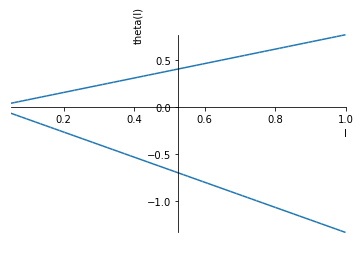

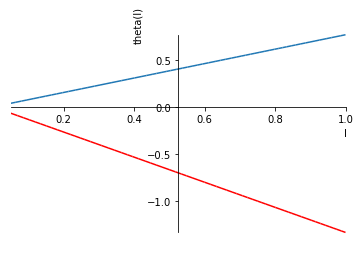

In [37]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(q = 1, m1 = .2, m2=.5, b1 = .5,b2 = .5)
graph4= plot(t1_param,t2_param,(l,.05,1),ylabel='theta(l)',xlabel='l')
graph4[0].line_color = 'r'
graph4.save('theta_plots/l_seq.png')

In [22]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1, m1 = .2, m2=.5, b1 = .5,b2 = .5)
graph4= plot(t1_param,t2_param,(q,.05,1),ylabel='theta(q)',xlabel='q')
graph4[0].line_color = 'r'
graph4.save('theta_plots/q_seq.png')

IndexError: list index out of range